Model Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      0.97      0.99        73
           2       0.98      1.00      0.99        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

Confusion Matrix:
 [[87  0  0]
 [ 0 71  2]
 [ 0  0 80]]
Model saved as model.pkl


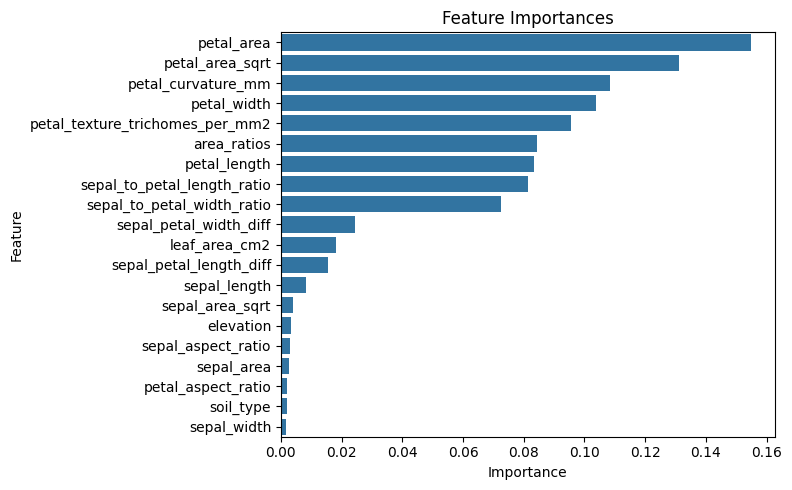

In [ ]:
# iris_model_trainer_fixed.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load extended Iris dataset
df = pd.read_csv("/content/iris_extended.csv")

# Encode categorical columns (e.g., 'loamy', 'dry', etc.)
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Features and target
if 'species' in df.columns:
    target = 'species'
elif 'class' in df.columns:
    target = 'class'
else:
    raise ValueError("No target column ('species' or 'class') found.")

X = df.drop(columns=[target])
y = df[target]

# Encode target if it's still object
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved as model.pkl")

# ------------------
# Visualizations
# ------------------

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
